# Classifying Patient Mortality from Breast Cancer Data

<center><img src="https://img.freepik.com/free-photo/world-cancer-day-breast-cancer-awareness-ribbon-white-backg_1232-3604.jpg?w=2000" width="400"></center>

Breast cancer is the most common malignancy among Canadian women (excluding non-melanoma skin cancers) (Li J, et al. 2021). It is the second most typical cancer-related cause of mortality among Canadian women. (Unger-Saldaña, 2014).


According to Brenner, et al 2022, Projections show that in 2022:


* 28,600 Canadian women will be diagnosed with breast cancer. This will represent 25% of all new cases of cancer in women in 2022.

* 5,500 Canadian women will die from breast cancer. This will be the cause of 14% of all female cancer deaths in 2022.

* In Canada, 1 in 8 women will eventually get breast cancer, and 1 in 34 will pass away from it. 

The clinical stage to which the cancer has progressed when diagnosed is one of the most important factors in determining the prognosis and ultimate survival of patients. In many cases, patients were unaware that they possessed any cancer risks, delaying the diagnosis (Ferlay, J, et al. 2021). It can be beneficial to develop a medium through which individuals could be screened for breast cancer risks before they even occur. Individuals with higher threat can be identified, notified, and given appropriate medical attention to avoid delayed diagnosis.

## Project Goal

**This project aims to formulate multiple classification prediction mechanisms, and compare and employ the best model to assess the risk of possessing breast cancer. The response variable will be the "Status" of patients.**

Classification models developed will be trained through breast cancer dataset (found off kaggle and hosted on github [here](https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv)). 



## Description of Variables


* **Age**: Age of breast cancer patient in years. 

* **Race**: One of White, Black or Other (American Indian/AK Native, Asian/Pacific Islander).

* **Marital Status**: One of Married, Divorced, Single, Widowed or Separated

* **T Stage**: One of T1, T2, T3 or T4. The T stage describes the size and scope of the primary tumour, in increasing order.

* **N Stage**: One of N1, N2 or N3. These terms describe the quantity and location of lymph nodes that are cancerous, in increasing order. 

* **6th Stage**: One of IIA, IIIA, IIIC, IIB or IIIB. Combining the T, N, and M categories, the tumour grade, and the outcomes of ER/PR and HER2 tests, doctors determine the cancer stage.

* **Diffrentiate**: One of Well Diffrentiated, Moderately Diffrentiated, Poorly Diffrentiated, or Undiffrentiated. 

* **Grade**: One of 1, 2, 3, or anaplastic; Grade IV. 

* **A Stage**: One of Regional or Distant.  Regional — A neoplasm that has extended, Distant — A neoplasm that has spread to parts of the body. 

* **Tumor Size**: Relative size of Tumor cells.

* **Estrogen Status**: One of Positive or Negative. Estrogen positives describe cancer cells that need estrogen to grow. Estrogen negative are a group of tumors with poor prognosis and fewer cancer prevention and treatment strategies.

* **Progesterone Status**: One of Positive or Negative. Progesterone positive is a type of breast cancer sensitive to progesterone. Progesterone negative breast cancers have no estrogen or progesterone receptors.

* **Regional Node Examined**: Number of regional nodes examined. Regional nodes are axillary lymph nodes that receive the majority of the lymphatic drainage from quadrants of the breast. 

* **Regional Node Positive**: Number of regional nodes counted as positive (metastases greater than 0.2mm).

* **Survival Months**: Months Survived with condition.

* **Status**: One of Alive or Dead.

## Exploratory Data Analysis

### Loading Necessary Libraries

In [5]:
library(tidyverse)
library(GGally)
library(corrplot)
library(glmnet)
library(boot)
library(ROSE)
library(car)
library(pROC)
library(caret)
library(broom)

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"

Attaching package: 'car'


The following object is masked from 'package:boot':

    logit


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Warning message:
"package 'pROC' was built under R version 4.2.2"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:boot':

    melanoma



Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




Some of these packages were installed through the code below. In case a library above is not found, please refer to the code block below to download all necessary packages!

In [ ]:
install.packages("pROC")
install.packages("ROSE")
install.packages("car")
install.packages("corrplot")
install.packages("glmnet")

### Load data 

In [6]:
cancer_dataset = read.csv('https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv')
colnames(cancer_dataset)[14] = "Regional.Node.Positive"
colnames(cancer_dataset)[6] = "6th.Stage"
head(cancer_dataset, n = 5)

,Age,Race,Marital.Status,T.Stage,N.Stage,6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Data Preprocessing

We notice from the first few rows of the dataset that all categorical covariates are loaded as character-type variables whereas we would like them to be of factor-type so we do the same below. 

In [7]:
#Changing categorical variables into factors
col_names <- c(2:9,11:12,16)
cancer_dataset[,col_names]<-lapply(cancer_dataset[,col_names], factor)
head(cancer_dataset)
# col_names

,Age,Race,Marital.Status,T.Stage,N.Stage,6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


## Preliminary Observations of data

In [8]:
column_names = colnames(cancer_dataset)
features = column_names[-length(column_names)]
features
cat("The dimensions of our dataset are: ", dim(cancer_dataset))

[1] "Age"                    "Race"                   "Marital.Status"        
 [4] "T.Stage"                "N.Stage"                "6th.Stage"             
 [7] "differentiate"          "Grade"                  "A.Stage"               
[10] "Tumor.Size"             "Estrogen.Status"        "Progesterone.Status"   
[13] "Regional.Node.Examined" "Regional.Node.Positive" "Survival.Months"

The dimensions of our dataset are:  4024 16

We have fifteen possible features, listed above that can help us gauge the status of a patient given these features of their cancer condition. 

In [9]:
glimpse(cancer_dataset)

Rows: 4,024
Columns: 16
$ Age                    <int> 68, 50, 58, 58, 47, 51, 51, 40, 40, 69, 68, 46,…
$ Race                   <fct> White, White, White, White, White, White, White…
$ Marital.Status         <fct> Married, Married, Divorced, Married, Married, S…
$ T.Stage                <fct> T1, T2, T3, T1, T2, T1, T1, T2, T4, T4, T1, T3,…
$ N.Stage                <fct> N1, N2, N3, N1, N1, N1, N1, N1, N3, N3, N1, N1,…
$ `6th.Stage`            <fct> IIA, IIIA, IIIC, IIA, IIB, IIA, IIA, IIB, IIIC,…
$ differentiate          <fct> Poorly differentiated, Moderately differentiate…
$ Grade                  <fct> 3, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2,…
$ A.Stage                <fct> Regional, Regional, Regional, Regional, Regiona…
$ Tumor.Size             <int> 4, 35, 63, 18, 41, 20, 8, 30, 103, 32, 13, 59, …
$ Estrogen.Status        <fct> Positive, Positive, Positive, Positive, Positiv…
$ Progesterone.Status    <fct> Positive, Positive, Positive, Positive, Positiv…
$ Regional.Node.

This information allows us to ensure that our datatypes for our categorical variables are all of the correct type `factor` and `int` or `double` for our continuous variables. 

In [ ]:
is.null(cancer_dataset)

Our dataset also has 0 null valued points, which makes it easier for us as we do not need to get rid of any of our training examples. 

In [ ]:
summary(cancer_dataset)

> *_TODO_*
Add interpretation for summary statistics

## Class Imbalance of Response Variable

As we are trying to investigate a classification problem, we want to see if there is any heavy class imbalance in our data. We visualize the class distribution with a bar chart below:

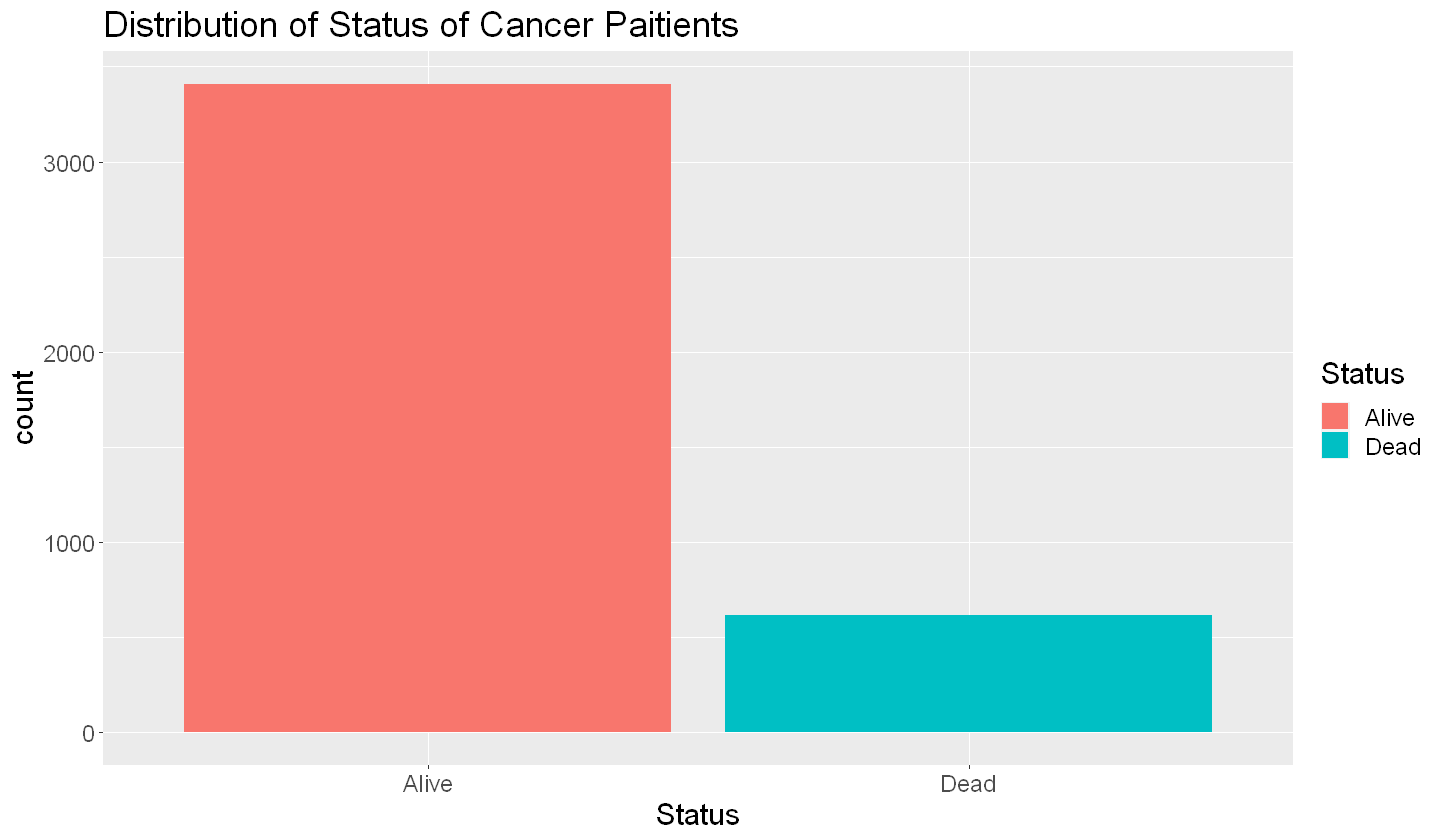

In [11]:
# visualizing the distribution of classes 
options(repr.plot.width = 12, repr.plot.height = 7)

cancer_dataset %>%
    ggplot(aes(x=Status)) +
    geom_bar(aes(fill=Status)) +
    labs(title="Distribution of Status of Cancer Paitients") +
    theme(text = element_text(size=18))

<center> Fig 1: Class Imbalance in Target Variable Status </center>

We see that there are a lot more patients alive than dead in our dataset. This indicates class imbalance. If not accounted for, a classifier which always predicted patients to be alive would have a deflated classification error rate. Further investigation is needed to tackle this issue.

## Checking For Multicollinearity

### Scatterplot

We check for multicollinearity between quantitative variables through scatterplots: 

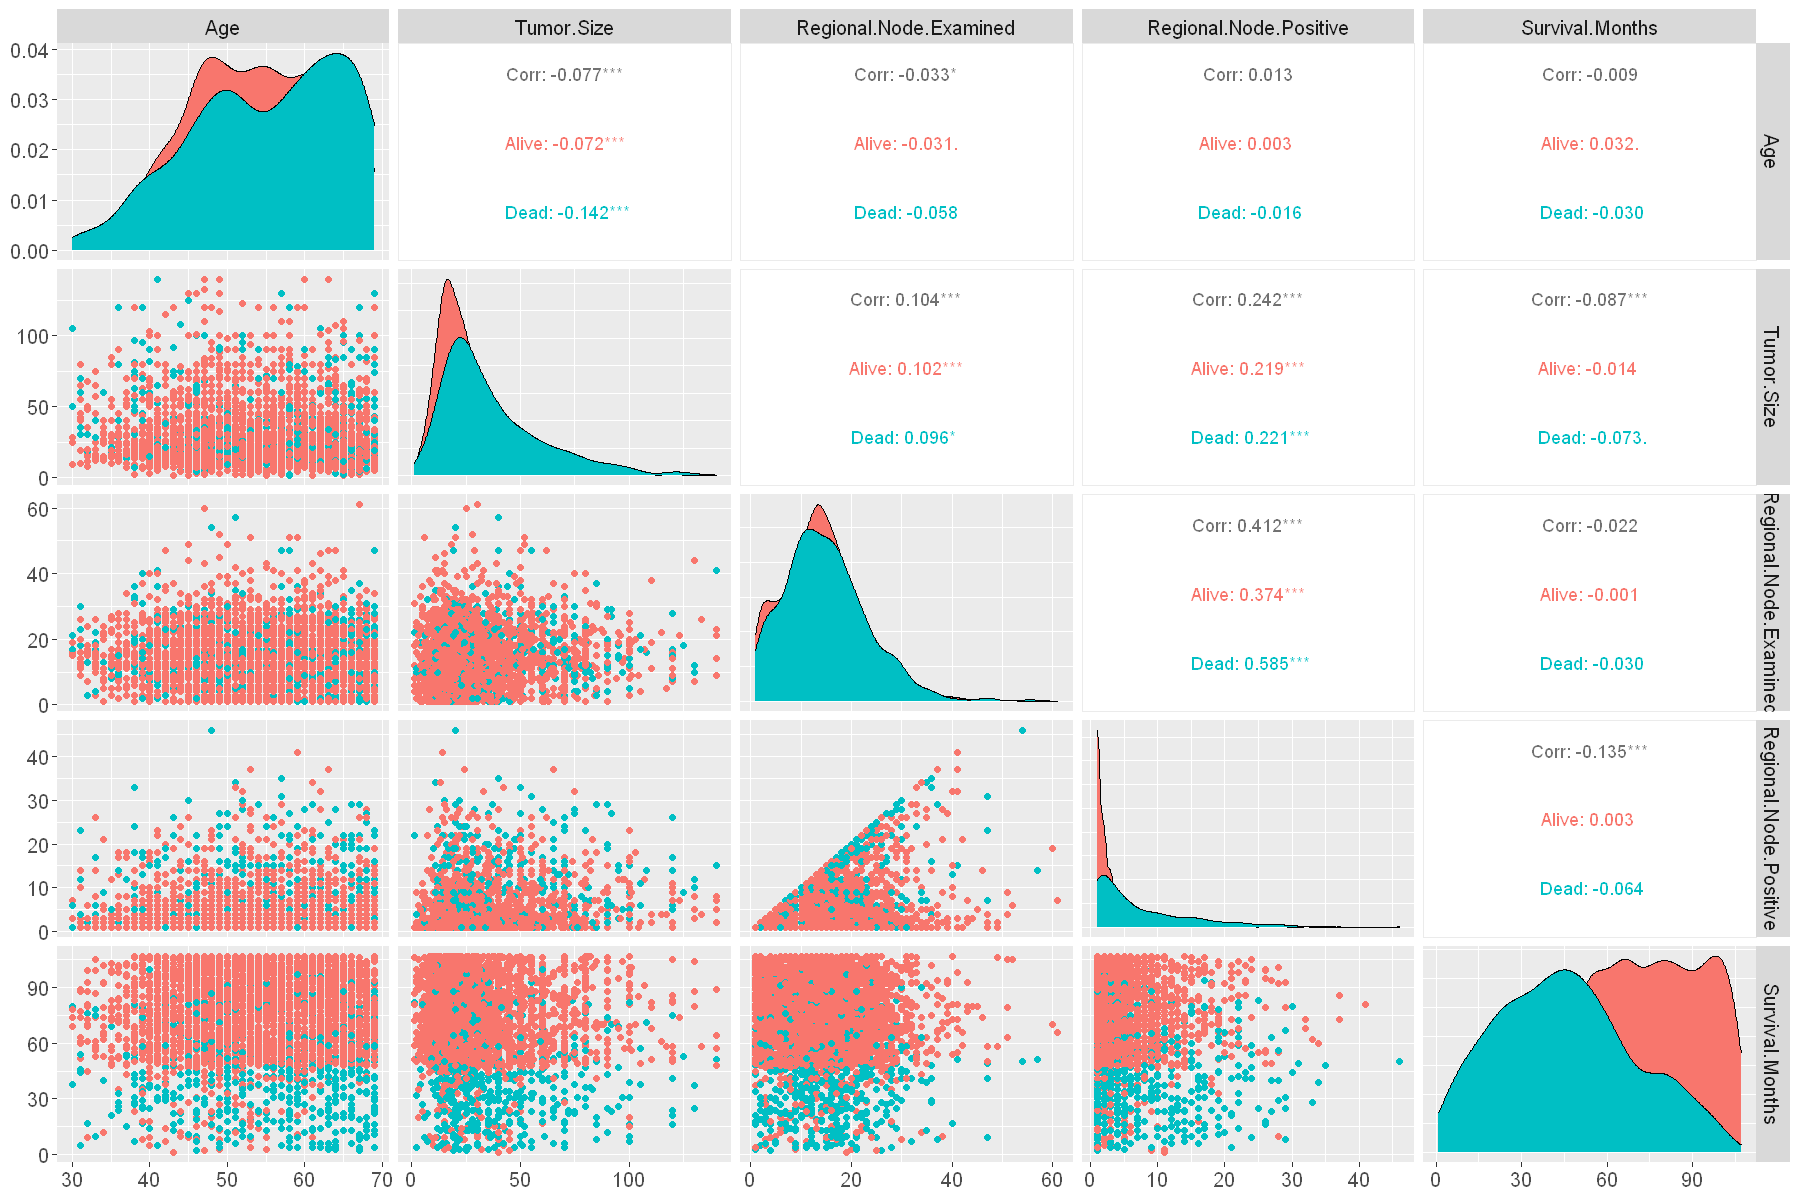

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)

cancer_dataset_quan <- cancer_dataset %>% 
    select(Age, Tumor.Size, Regional.Node.Examined, Regional.Node.Positive, Survival.Months, Status)

ggpairs(cancer_dataset_quan,
    mapping = ggplot2::aes(color = Status),
    columns = 1:5) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

From examining the plots above, many of the plots seem to have points randomly scattered with no obvious pattern, suggesting that a majority of the predictors do not have much correlation with each other. However, from examining the scatterplot between `Regional.Node.Examined` and `Regional.Node.Positive`, we observe that the points form a funnel shape with the x-axis. From this, we suspect that these predictors would have higher correlation than other pairs of predictors. Checking with the upper triangular portion of the graphic, we see that most correlation values are low, with exception of the pairs (`Regional.Node.Poistive`, `Tumor.Size`) and (`Regional.Node.Poistive`, `Regional.Node.Examined`). These pairs have correlation values of $0.242$ and $0.412$ respectively. 

Overall, predictors are not very correlated with one another, as the magnitude of correlation values are not larger than $0.5$. 

### Heatmap

Because of the nature of the dataset and how its data was collected, there is a high chance of collinearity between categorical variables as well as quantitative variables. 

We creat a heatmap to capture any of these possibilities.

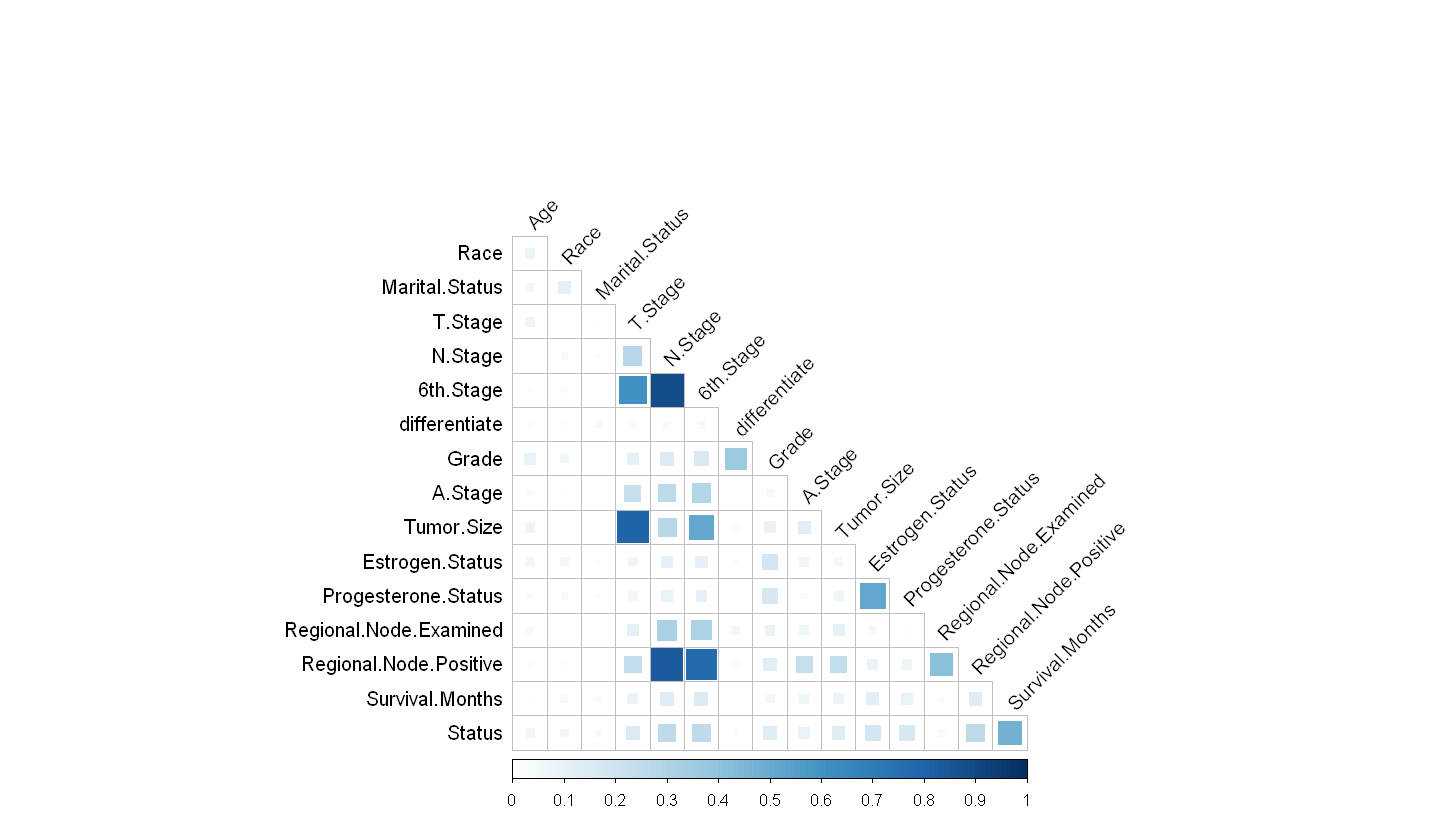

In [12]:
cancer_matrix <- data.matrix(cancer_dataset)
corrplot(abs(cor(cancer_matrix)),
         method = "square", type = "lower", diag = FALSE, tl.col = "black", tl.srt = 45, col.lim = c(0,1)) 

From this visualization we discover additional high correlations, particularly between:

- 6th.Stage and N.Stage 
- Tumor.Size and T.Stage 
- Regional.Node.Positive and N.Stage 
- Regional.Node.Positive and 6th.Stage 

These pairs of predictors have correlations close to 1, meaning that they are close to being perfectly correlated. Using all the predictors means multicollinearity will be introduced into our model, leading to lower precision in estimated coefficients. Therefore, a subset of these covariates will need to be accounted for prior to training any models. 

## Methods

The majority of the existing reports on using machine learning to predict the 5-year survival rate of breast cancer have varying results, much of which can be attributed to having taken insufficient data preprocessing steps (Li et al., 2021). With this in mind, we took caution to be thorough in conducting our EDA through taking extra steps to clean our data, check for nulls, and clearly understanding the variables we are working with. Using various visualizations, we are able to gauge the severity of the class imbalance and multicollinearity present in the dataset. Finally, since our dataset is large (n > 4000), we can assume that the CLT takes effect regardless of the distribution of our data. 

We plan on taking the following steps to complete our final report. 

1. Considering the size of our data set, we plan to set aside 20% of our data to use as a test set. With the remaining 80%, we will form training and validation sets.

2. To solve the class imbalance issue, we can consider the approach of random over-sampling of the under-represented class.

3. Then, we will explore VIF values to identify covariates which contribute the most to the multicollinarity we witnessed, and exclude them in the fitting of future models. Additionally, as suggested by Herawati, et al (2018), we are going to use ridge and LASSO regularization (including a post LASSO model) to deal with the issue of multicollinearity

4. We will fit all the models mentioned above - full logistic model, ridge, LASSO and post-LASSO models with the training data.

5. Using evaluation metrics of AUC on each of those models, we will estimate the testing errors and select the model that produces the smallest prediction risk.

6. Finally, we will evaluate the performance of the best model using appropriate measures for the test set MSE and interpret the results for discussion.

With respect to the work that has already been done on breast cancer datasets, as well as the complexity of the interactions between variables, we do not expect very high accuracy in our model. Instead, we aim to build the most robust predictive screening model we can through employing concepts explored in class.

Data on breast cancer, especially in developing countries, is scarce (Unger-Saldana, 2014). Regardless of the accuracy of our model and our overall results, this report should be able to aid in contributing valuable information to the scope of machine learning for breast cancer. Since there is so little existing cases to draw from, our results could provide a point of reference for how significant of an effect imbalanced classes may have and whether simplistic methods like repeated sampling are sufficient to solve them, as well as what kind of factors may be more useful. 

## Experiments with Data


### Assessment for class imbalance and adjustments accordingly 

We see from Fig 1, in our sample that around 84% of the sample data has 'Alive' labels, while the rest (around 16%) have 'Dead' labels. One way to solve this problem is to oversample the examples in the minority class. This can balance the class distribution by over representation of the minority class. This is a widely used technique in commonly used in similar studies, and we shall be using the same in our analysis.

In [13]:
# install.packages("smotefamily")
# library(smotefamily)
# set.seed(1234)
# library(DMwR)
# install.packages("ROSE")


#changing "6th.stage" column name to "six_stage" to work better with oven.sample
colnames(cancer_dataset)[6] = "six_stage"
# colnames(cancer_dataset)

new_df <- ovun.sample(Status~.,
                      data = cancer_dataset, p=0.5, seed=1, method="over")$data
table(new_df$Status)

cancer_dataset<-new_df



Alive  Dead 
 3408  3381 

## Model Selection

### Splitting training and test set

First, we need to conduct a train-test split of our data to minimize bias and ensure some form of out-of-sample performance. We will be choosing a 80% to 20% train-to-test split for experimentation. 

In [14]:
set.seed(540)

split = sample(c(TRUE, FALSE), nrow(cancer_dataset), replace = TRUE, prob = c(0.8, 0.2))
cancer_dataset_train = cancer_dataset[split, ]
cancer_dataset_test = cancer_dataset[!split, ]

dim(cancer_dataset_train)
dim(cancer_dataset_test)

[1] 5489   16

[1] 1300   16

### find VIF values

We will try to find the VIF values for the covariates to find the ones that account the most  multicollinearity.

In [34]:

vif_model = vif(
    glm(Status ~ ., data = cancer_dataset_train, family = 'binomial')
)

vif_LASSO_model

ERROR: Error in vif.default(glm(Status ~ ., data = cancer_dataset_train, family = "binomial")): there are aliased coefficients in the model


We notice from the error that our model has aliased coefficients, this there are columns in our dataset (after producing dummy variables for the discrete covariates) that have 100% correlation. Under these situations we cannot produce VIF values.
Hence, there is no systematic way we can choose to discard covariates to resolve for multicollinearity other than the using Ridge, LASSO and post-LASSO as mentioned in the methods section. So we will continue our exploration by fitting the three proposed models!

### Fitting Ridge, LASSO and Post-LASSO

We want to compare three different methods of fitting a classification model to the data: ridge, LASSO, and post-LASSO with logistic regression. LASSO produces biased estimates, so we suspect performing post-LASSO would have a postive effect on predictive performance. For all three methods, we need to choose the tuning parameter $\lambda$, so we perform 5-fold cross validation:

In [24]:
#process data into matrices for cv.glmnet

model_cancer_X_train <- 
    model.matrix(object = Status ~ .,
                 data = cancer_dataset_train)[, -1]
cancer_X_train <- 
    as.matrix(cancer_dataset_train$Status, ncol = 1)


#LASSO regression with 5 kfold cv
cancer_cv_lambda_LASSO <- 
    cv.glmnet(
        x = model_cancer_X_train, 
        y = cancer_X_train,
        alpha = 1,
        family = "binomial",
        type.measure = "mse",
        nfolds = 5)


#Ridge regression with 5 kfold cv
cancer_cv_lambda_ridge <- 
    cv.glmnet(
        x = model_cancer_X_train, 
        y = cancer_X_train,
        alpha = 0,
        family = "binomial",
        type.measure = "mse",
        nfolds = 5)

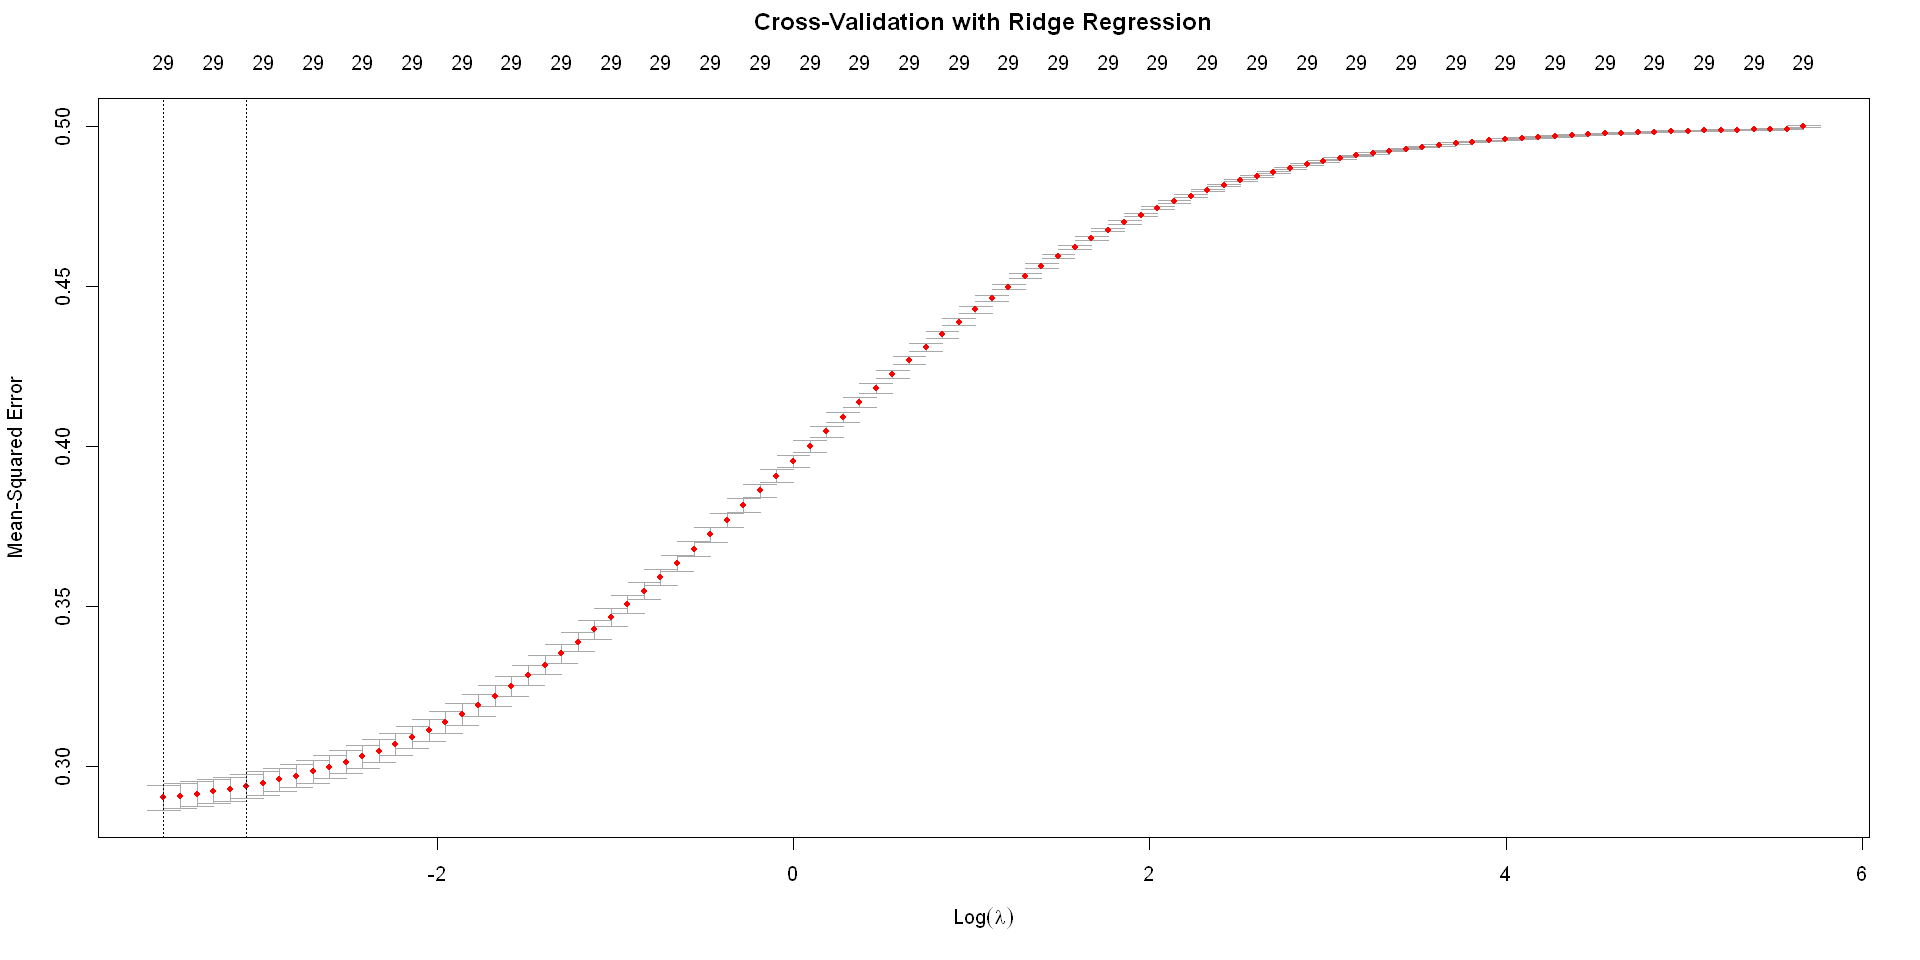

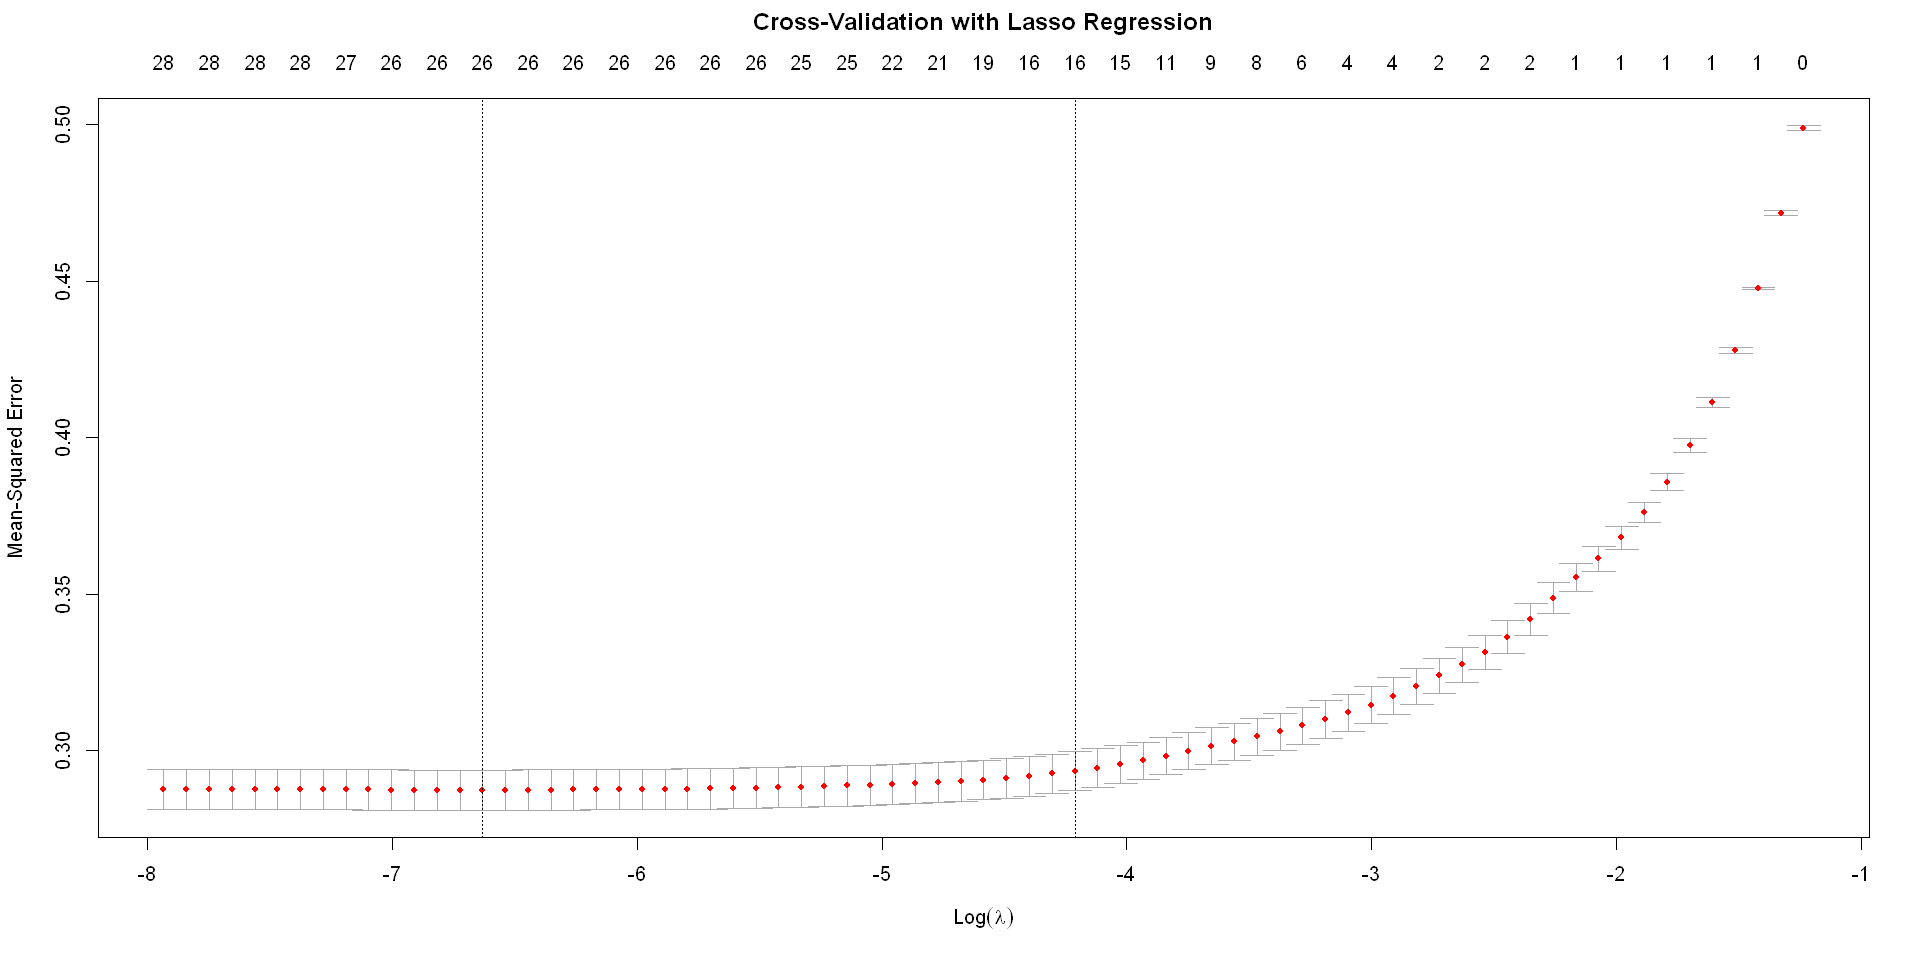

In [26]:
options(repr.plot.width = 16, repr.plot.height = 8)

plot(cancer_cv_lambda_ridge, 
     main = "Cross-Validation with Ridge Regression\n\n")
plot(cancer_cv_lambda_LASSO, 
     main = "Cross-Validation with Lasso Regression\n\n")

With LASSO, we want to perform as much variable selection on our covariates as possible. From the MSE vs log($\lambda$) plot above, the MSE between $\lambda_{min}$ and $\lambda_{1se}$ is marginal. Once again, looking at the MSE vs log($\lambda$) for ridge regression above, the MSE between $\lambda_{min}$ and $\lambda_{1se}$ is marginal. Before deciding on which $\lambda$ value to choose, we look at the coefficients vs log($\lambda$) plots below: 

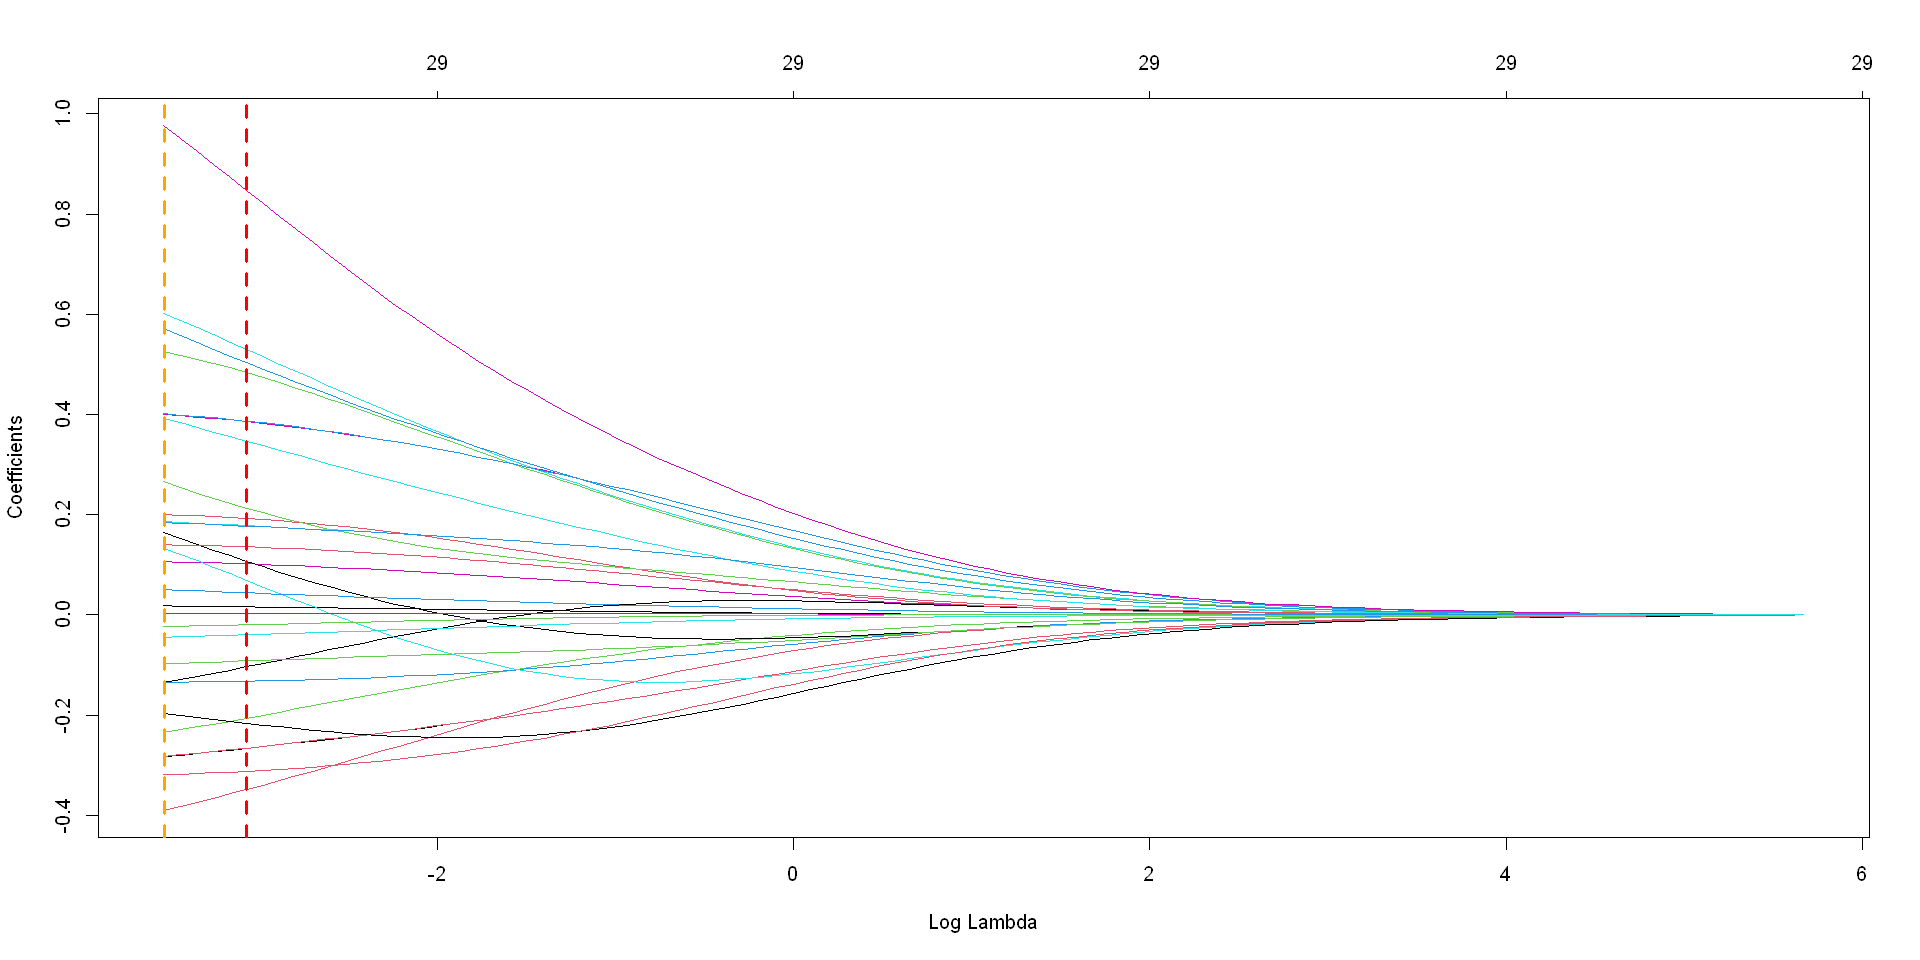

In [32]:
options(repr.plot.width = 16, repr.plot.height = 8)
cancer_lambda_1se_MSE_ridge <- round(cancer_cv_lambda_ridge$lambda.1se, 4)
cancer_lambda_min_MSE_ridge <- round(cancer_cv_lambda_ridge$lambda.min, 4)
plot(cancer_cv_lambda_ridge$glmnet.fit, "lambda")
abline(v = log(cancer_lambda_1se_MSE_ridge), col = "red", lwd = 3, lty = 2)
abline(v = log(cancer_lambda_min_MSE_ridge), col = "orange", lwd = 3, lty = 2)

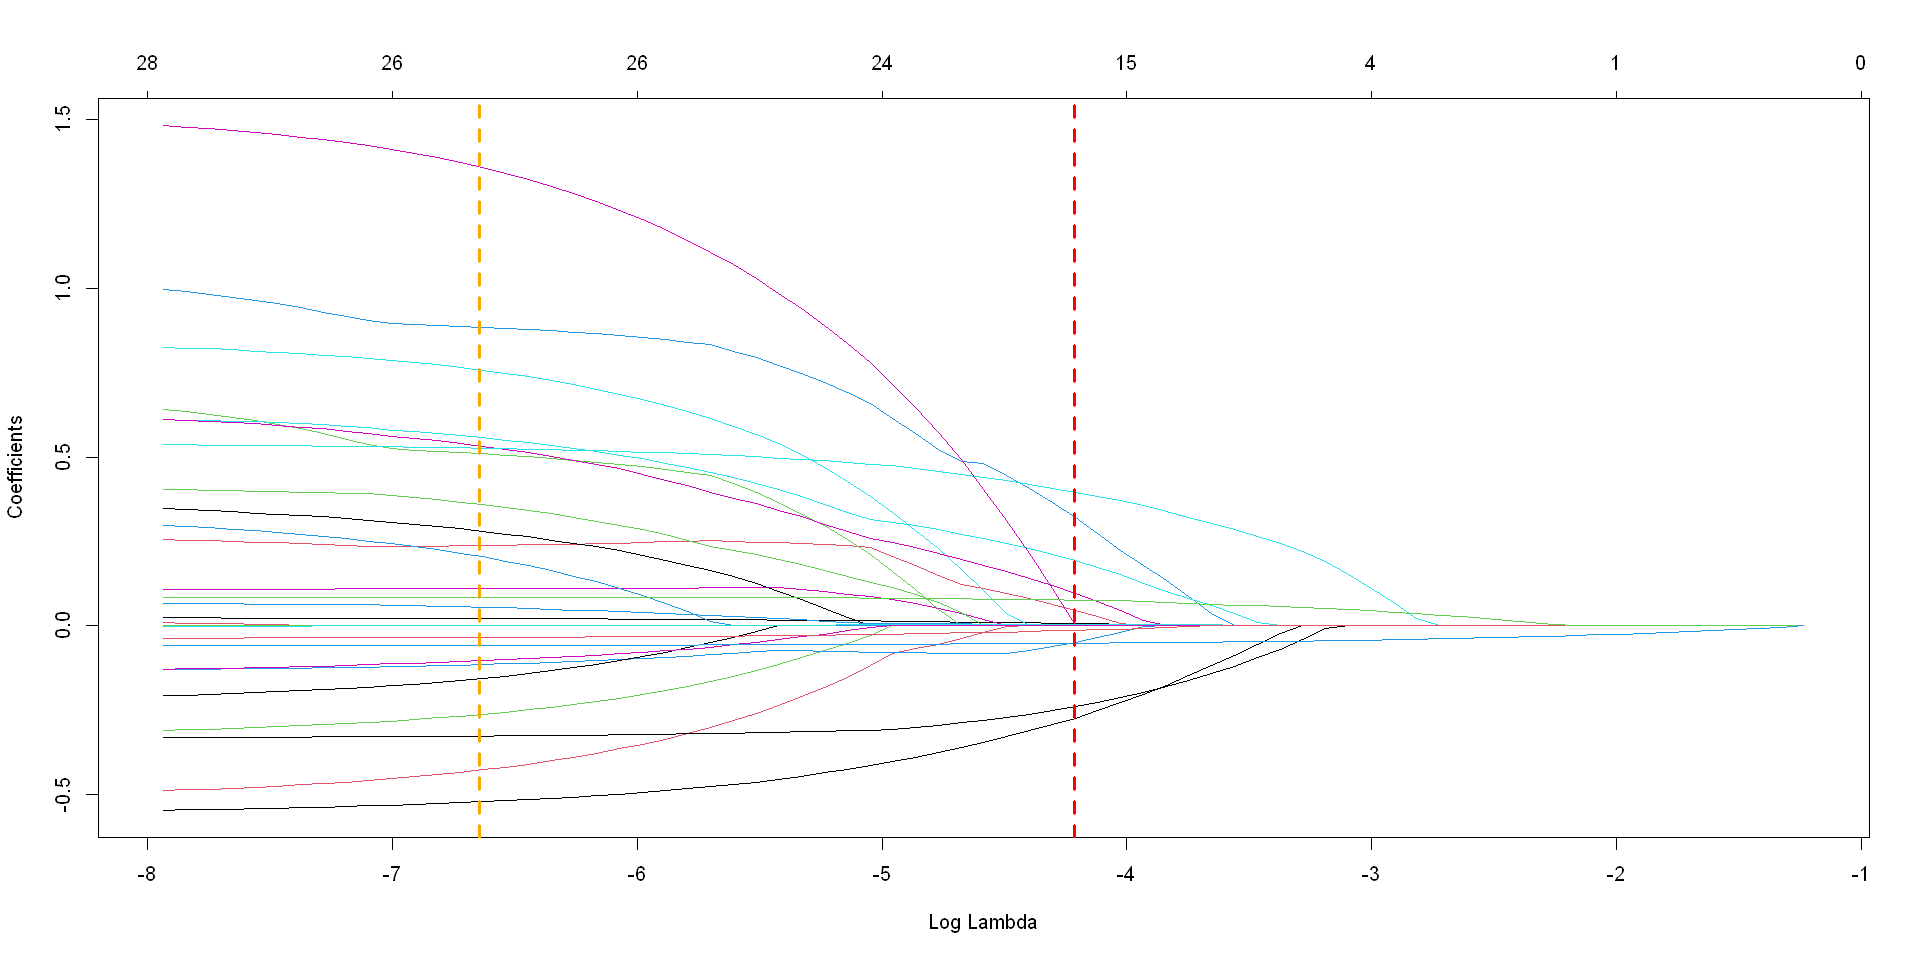

In [33]:
options(repr.plot.width = 16, repr.plot.height = 8)
cancer_lambda_1se_MSE_LASSO <- round(cancer_cv_lambda_LASSO$lambda.1se, 4)
cancer_lambda_min_MSE_LASSO <- round(cancer_cv_lambda_LASSO$lambda.min, 4)
plot(cancer_cv_lambda_LASSO$glmnet.fit, "lambda")
abline(v = log(cancer_lambda_1se_MSE_LASSO), col = "red", lwd = 3, lty = 2)
abline(v = log(cancer_lambda_min_MSE_LASSO), col = "orange", lwd = 3, lty = 2)

Checking the coefficients vs log($\lambda$) plot for ridge regression above, we see that at $\lambda_{1se}$, not much shrinkage of coefficients is occuring. However, at $\lambda_{min}$, even less shrinkage happens. 
Compared to the same plot for LASSO, we observe visually that more coefficients have been shrunk/forced to zero when using $\lambda_{1se}$ over $\lambda_{min}$. 
The goal of performing ridge and LASSO is to shrink coefficients as we know there is multicollinearity occuring in our dataset. Therefore, for both ridge and LASSO, we choose $\lambda_{1se}$, which does more shrinkage than $\lambda_{min}$ while retaining similar mean squared error. 

We now proceed to doing post-LASSO for logisitic regression using $\lambda = \lambda_{1se, \text{LASSO}}$. We see which variables LASSO selects, then perform logistic regression with those variables. We also perform 5-fold cross validation to get an estimate of the test error.  

In [44]:
cancer_LASSO_1se_MSE <- 
    glmnet(
        x = model_cancer_X_train, 
        y = cancer_X_train,
        alpha = 1,
        family = "binomial",
        lambda = cancer_lambda_1se_MSE_LASSO)

coef(cancer_LASSO_1se_MSE)

30 x 1 sparse Matrix of class "dgCMatrix"
                                              s0
(Intercept)                         2.531780e+00
Age                                 6.348345e-03
RaceOther                           .           
RaceWhite                           .           
Marital.StatusMarried              -4.872924e-02
Marital.StatusSeparated             .           
Marital.StatusSingle                .           
Marital.StatusWidowed               .           
T.StageT2                           4.560410e-02
T.StageT3                           .           
T.StageT4                           3.224400e-01
N.StageN2                           1.935471e-01
N.StageN3                           9.936519e-02
six_stageIIB                        .           
six_stageIIIA                       .           
six_stageIIIB                       .           
six_stageIIIC                       7.204127e-16
differentiatePoorly differentiated  3.943103e-01
differentiateUndifferentiat

In [61]:
LASSO_coef<-cancer_dataset_train%>%
select(c(Age, Marital.Status, T.Stage, , N.Stage, six_stage, differentiate, Grade, Tumor.Size, 
         Progesterone.Status, Regional.Node.Examined, Regional.Node.Positive, Survival.Months, 
         Status))

# couldn't figure out how to use cv.glm properly so we use spaghetti code 
kfold_cv <- function(data, estimator, predictor, error_fun, kfolds = 5) {
  n <- nrow(data)
  fold_labels <- sample(rep(1:kfolds, length.out = n))
  errors <- double(kfolds)
  for (fold in seq_len(kfolds)) {
    test_rows <- fold_labels == fold
    train <- data[!test_rows, ]
    test <- data[test_rows, ]
    current_model <- estimator(train)
    ypred <- predictor(current_model, test)
    errors[fold] <- error_fun(test, ypred)
  }
  mean(errors)
}

logit_estimator <- function(dataset) glm(formula = Status ~ ., data=dataset, family="binomial")
logit_predict <- function(mod, dataset) ifelse(predict(mod, dataset, type="response") > 0.5, "Dead", "Alive")
logit_err <- function(testdata, ypred) mean(testdata$Status != ypred)

post_LASSSO_err_est = kfold_cv(LASSO_coef, logit_estimator, logit_predict, logit_err, kfolds=5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [63]:
#Extracting 1se from LASSO and Ridge models

cancer_lambda_1se_AUC_LASSO <- round(cancer_cv_lambda_LASSO$lambda.1se, 4)
cancer_lambda_1se_AUC_ridge <- round(cancer_cv_lambda_ridge$lambda.1se, 4)

# Tibble to compare AUC of diff models; need to add the non-penalized logit model from above!

breast_cancer_AUC_models <- 
    tibble(
        Model = c("LASSO", "Ridge", "Post-LASSO"),
        MSE = c(cancer_cv_lambda_LASSO$cvm[cancer_cv_lambda_LASSO$index["1se",]], 
                cancer_cv_lambda_ridge$cvm[cancer_cv_lambda_ridge$index[1]],
                post_LASSSO_err_est))

breast_cancer_AUC_models

Model,MSE
<chr>,<dbl>
LASSO,0.2934095
Ridge,0.2900744
Post-LASSO,0.2047756


From above, we see a warning indicating that our fit is rank-deficient, indicating that performing post-LASSO did not help with the multicollinearity problem we detected from our exploratory data analysis. Despite this, looking at the MSE table above, we see that post-LASSO has the lowest MSE score out of all three models. 

In addition to looking at the MSE estimates, we also look at the AUC scores of these models:

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



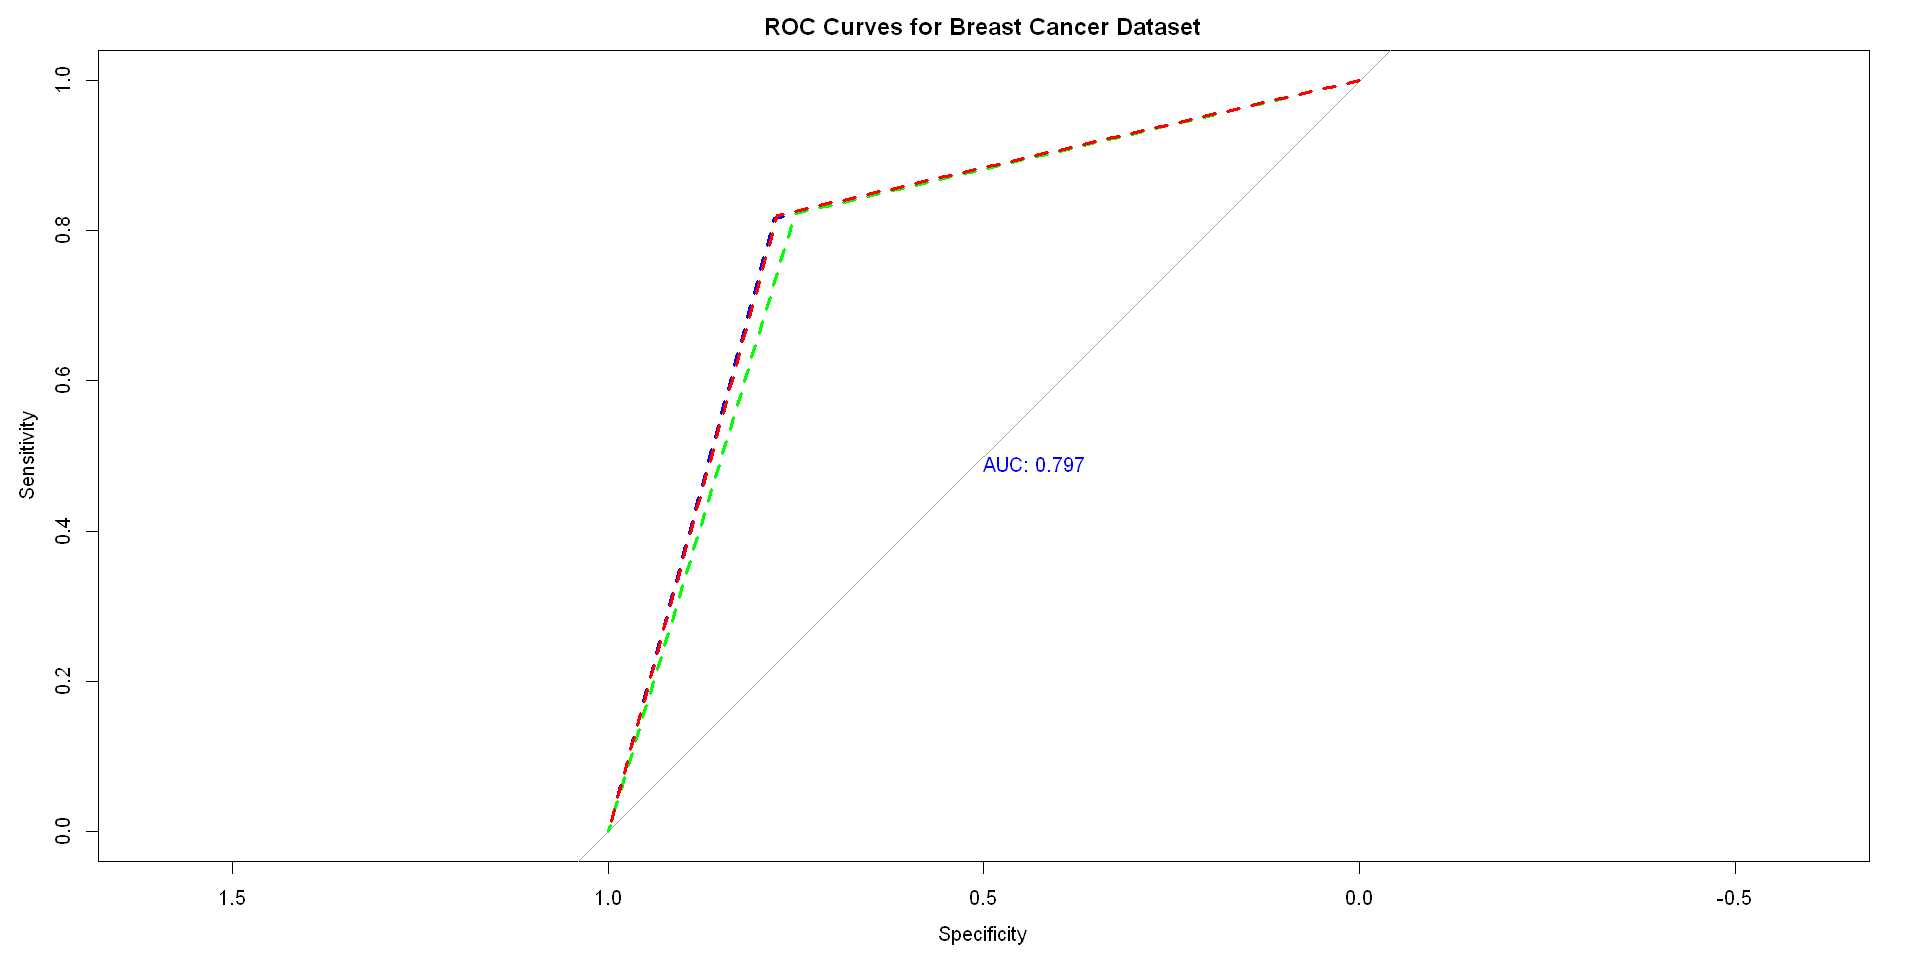

In [94]:
# train missing model on the full training data

post_LASSO_logistic_mod<- glm(Status~., data = LASSO_coef, family = "binomial")

post_LASSO_preds <- ifelse(predict(post_LASSO_logistic_mod, type="response") > 0.5, 0, 1)
LASSO_preds <- ifelse(predict(cancer_cv_lambda_LASSO, model_cancer_X_train,
                              s="lambda.1se", type="response") > 0.5, 
                      0, 1)
ridge_preds <- ifelse(predict(cancer_cv_lambda_ridge, model_cancer_X_train, 
                               s="lambda.1se", type="response") > 0.5,
                       0, 1)
status_ROC <- factor(ifelse(cancer_dataset_train$Status == "Dead", 0 , 1), ordered=TRUE)

ROC_post_LASSO <- roc(
  response = status_ROC,
  predictor = factor(post_LASSO_preds, ordered=TRUE)
)
ROC_ridge <- roc(
  response = status_ROC,
  predictor = factor(ridge_preds, ordered=TRUE)
)
ROC_lasso <- roc(
  response = status_ROC,
  predictor = factor(LASSO_preds, ordered=TRUE)
)

plot(ROC_post_LASSO,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Breast Cancer Dataset"
)
lines.roc(ROC_ridge, col = "green", lwd = 3, lty = 2, print.auc=TRUE)
lines.roc(ROC_lasso, col = "red", lwd = 3, lty = 2)

From the ROC curves, it seems that LASSO and post-LASSO have the greatest AUC value, with post_LASSO having a slightly larger AUC value. As the post-LASSO model has both the lowest estimated test error (MSE) as well as the highest AUC score, post-LASSO seems to be the best predicitive classifier. However, we note that from the warning above, the predictions from post-LASSO may be misleading. From the MSE table again, the estimates from ridge and LASSO are quite similar, so we turn to the ROC curves to decide which classifier to choose. From the ROC curves, we choose the model with the second highest AUC value: LASSO. 

We see how well the LASSO model performs on the test set: 

In [101]:
temp <- model.matrix(object = Status ~ .,
                 data = cancer_dataset_test)[,-1]
test_preds <- ifelse(predict(cancer_cv_lambda_LASSO, temp,
                              s="lambda.1se", type="response") > 0.5, "Dead", "Alive")

confusionMatrix(
    data = as.factor(test_preds),
    reference = as.factor(cancer_dataset_test$Status)
)

Confusion Matrix and Statistics

          Reference
Prediction Alive Dead
     Alive   511  155
     Dead    126  508
                                          
               Accuracy : 0.7838          
                 95% CI : (0.7605, 0.8059)
    No Information Rate : 0.51            
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.5679          
                                          
 Mcnemar's Test P-Value : 0.09485         
                                          
            Sensitivity : 0.8022          
            Specificity : 0.7662          
         Pos Pred Value : 0.7673          
         Neg Pred Value : 0.8013          
             Prevalence : 0.4900          
         Detection Rate : 0.3931          
   Detection Prevalence : 0.5123          
      Balanced Accuracy : 0.7842          
                                          
       'Positive' Class : Alive           
                     

## Discussion

### Summary of Findings and Proposed Improvements

The main challenge we encountered with this model is dealing with the multicollinearity of the categorical variables in this dataset. Although LASSO and Ridge regression were employed, they are not sufficient to deal with categorical variables. Since there were cases of perfect correlation in our dataset, VIF evaluation could not be employed either. It would be an interesting exploration to try and use other, more sophisticated methods of dealing with multicollinearity but it is currently beyond our research.

That being said, here are our results:

After completing the steps outlined in our initial proposal, we ultimately selected the LASSO model after evaluation against several types of model selection metrics. While the AUC suggests a reasonably accurate model performance, if we were to interpret our model through the lens of breast cancer prediction, we need to take into account additional relative measures.

Precision is the most important — in a life or death situation, the worst case scenario is false positive where a patient is incorrectly given an "Alive" prediction. Thus, we must maximize our precision. With a quick calculation, 511/(511+155) = 0.7673.

For the same reasons, we can imagine that the Sensitivity and Specificity measures are also important. These are 0.8022 and 0.7662, respectively.

Overall, it does appear that these relative measures are reflective of our overall model accuracy, and the error is well within our expectation. Given the clear multicollinearity we had discovered during our Preliminary Results as well seeing how complex the variables were through EDA, we are pleased with the performance of our model. Heeding the warning from Li et al, 2021 diligent data preprocessing we conducted along with careful consideration of how best to carry out model selection seems to have proved worthwhile. This also suggests that conducting an even more thorough EDA and data-preprocessing has the potential to really improve this model.

Future Research Data on breast cancer, especially in developing countries, is scarce (Unger-Saldana, 2014). We hope that this report contributes valuable information to the scope of machine learning for breast cancer. Our results may provide a point of reference for how carefully accounting for imbalanced classes and considering multicollinearity may be very beneficial to improving the accuracy of machine learning in breast cancer research. Despite this being only one report, our methods are easily reproducible. We hope that the small successes in this report may encourage the incorporation of more powerful techniques in future research.

## References

Li J, Zhou Z, Dong J, Fu Y, Li Y, Luan Z, et al. (2021) Predicting breast cancer 5-year survival using machine learning: A systematic review. PLoS ONE 16(4): e0250370. https://doi.org/10.1371/journal.pone.0250370

Unger-Saldaña K. (2014). Challenges to the early diagnosis and treatment of breast cancer in developing countries. World journal of clinical oncology, 5(3), 465–477. https://doi.org/10.5306/wjco.v5.i3.465 Brenner, Darren R., et al. "Projected estimates of cancer in Canada in 2022." CMAJ 194.17 (2022): E601-E607.

Ferlay, J., Colombet, M., Soerjomataram, I., Parkin, D. M., Piñeros, M., Znaor, A., & Bray, F. (2021). Cancer statistics for the year 2020: An overview. International journal of cancer, 149(4), 778-789.

King, Gary, and Langche Zeng. "Logistic regression in rare events data." Political analysis 9.2 (2001): 137-163.

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, 321-357.

Herawati, Netti, et al. "Regularized multiple regression methods to deal with severe multicollinearity." International Journal of Statistics and Applications 8.4 (2018): 167-172.